# Data Exploration Code-Along

Implement the code-blocks below in order to explore some common data-exploration techniques. We will be using the `realestate.xlsx` file again.

## Data Exploration I

Simple data explorations

In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# TODO: Load in your data from `../../data/realestate.csv`

...

In [80]:
# TODO: Observe first 5 rows

...

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
0,19.5,306.5947,9.0,42.2,4
1,13.3,561.9845,5.0,47.3,3
2,13.3,561.9845,5.0,54.8,4
3,5.0,390.5684,5.0,43.1,4
4,7.1,2175.0300,3.0,32.1,1


In [81]:
# TODO: describe tukey's numbers

...

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,17.533234,812.824629,4.880240,40.295509,2.835329
std,11.775630,984.274974,2.552282,12.756827,1.530415
min,0.000000,23.382840,1.000000,7.600000,1.000000
25%,7.800000,279.172600,3.000000,31.100000,2.000000
50%,15.600000,443.967700,5.000000,40.300000,3.000000
75%,29.250000,967.400000,7.000000,47.850000,4.000000
max,43.800000,6488.021000,10.000000,117.500000,6.000000


## Univariate Analysis

Observe single-variable distributions and counts.

<Axes: ylabel='Frequency'>

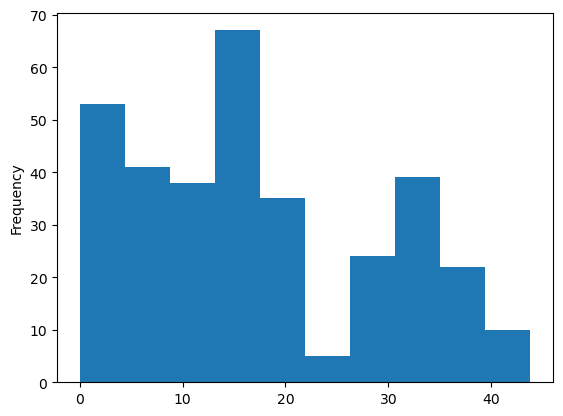

In [82]:
# TODO: make a histplot on "house age"
# which distributions/outliers do we observe?

...

In [83]:
# What we might be seeing here is a "bimodal distribution"
# that is, we have two seperate modes/means in our data
# https://statisticsbyjim.com/basics/bimodal-distribution/

# we should be on the lookout for categories in our dataset that have two seperate means when it comes to "age"

<Axes: ylabel='Frequency'>

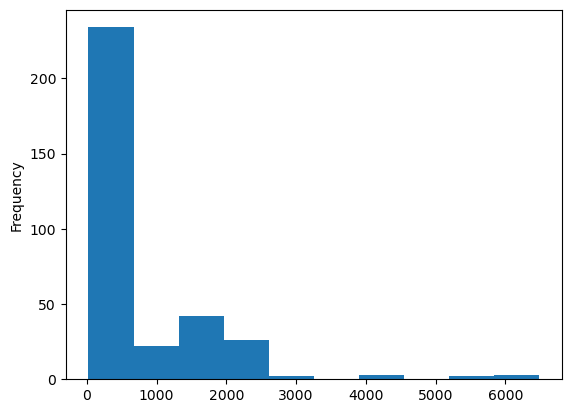

In [84]:
# TODO: make a histplot on "house age"
# which distributions/outliers do we observe?

...

<Axes: ylabel='Frequency'>

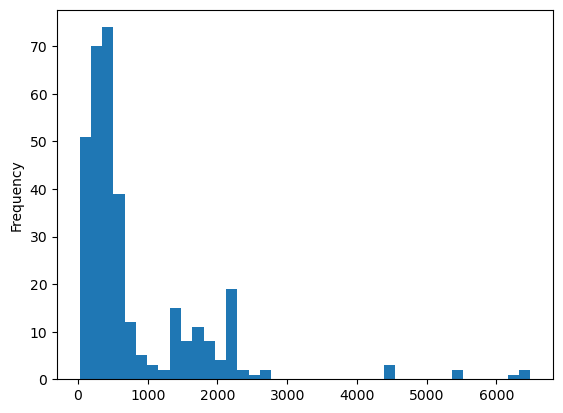

In [85]:
# TODO: let's increase the number of bins for a better overview

...

In [86]:
# seems like outliers are making this harder to gauge...
# however, unlike the previous data-points from yesterday
# we have no reason (yet) to suspect these data points are erroneous
# so, let's just keep them in our dataset

<Axes: ylabel='Frequency'>

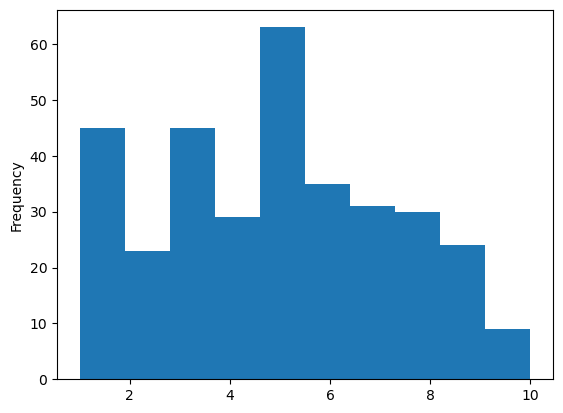

In [87]:
# TODO: make a histplot on "num_convenience_stores"
# which distributions/outliers do we observe?

...

<Axes: ylabel='Frequency'>

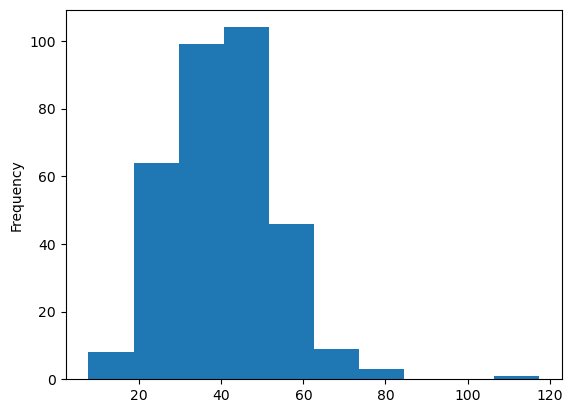

In [88]:
# TODO: make a histplot on "price_per_unit_area"
# which distributions/outliers do we observe?

...

In [89]:
# TODO: count the frequency of unique values in the "num_of_rooms" column, save this value into a new dataframe named "room_counts"
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

...

num_of_rooms
2    89
1    77
4    62
3    56
6    26
5    24
Name: count, dtype: int64

<Axes: xlabel='num_of_rooms'>

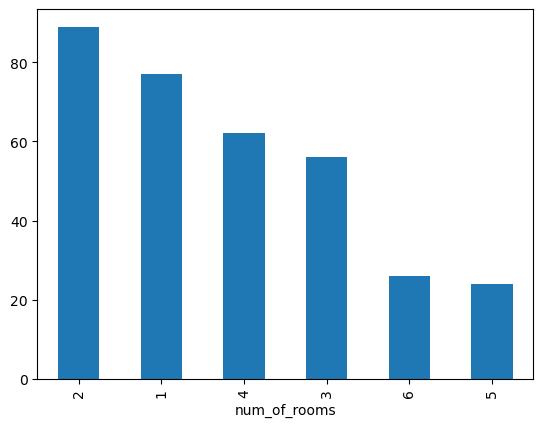

In [90]:
# TODO: plot a matplotlib barplot for the room_counts dataframe
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

...

## Bivariate Analysis

Observe relationships between two variables.

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


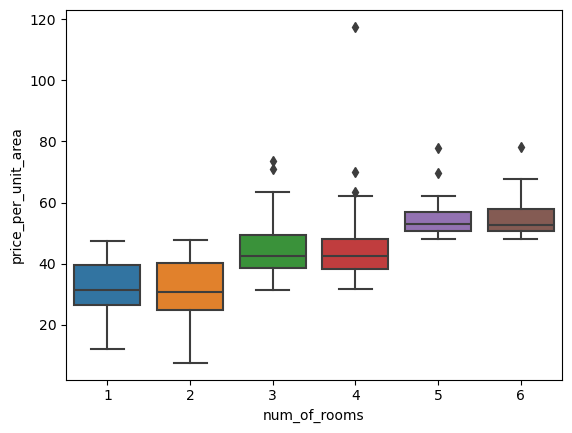

In [91]:
# TODO: Create a boxplot that reveals the range of "price_per_unit_area" for each "num_of_rooms" 
# Documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

...

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


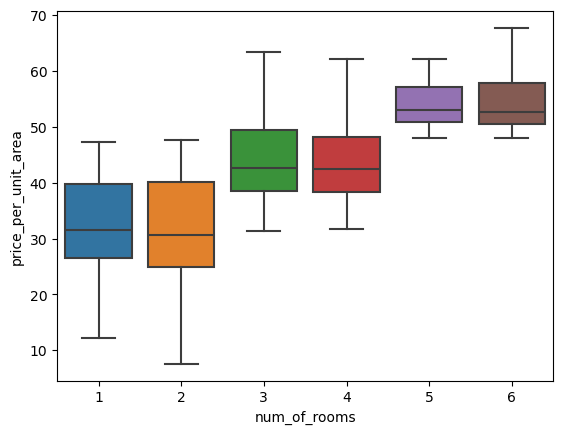

In [92]:
# TODO: same above, but ignore outliers
# Documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

...

In [101]:
# outliers are identified by the IQR upper and lower fence
# IQR = Q3 - Q1
# Q3 --> median above Q2
# Q1 --> median below Q2 

# upper fence = Q3 + (1.5 * IQR)
# lower fence = Q1 — (1.5 * IQR)

# we can calculate this ourselves...

three_rooms = df[df["num_of_rooms"] == 3]

stats = three_rooms["price_per_unit_area"].describe()
stats

count    56.000000
mean     44.841071
std       9.511826
min      31.300000
25%      38.525000
50%      42.550000
75%      49.400000
max      73.600000
Name: price_per_unit_area, dtype: float64

In [102]:
q1 = stats["25%"]
q3 = stats["75%"]

IQR = q3 - q1

upper_fence = q3 + (1.5 * IQR)
lower_fence = q1 - (1.5 * IQR)

In [103]:
upper_fence

65.7125

In [104]:
lower_fence

22.2125

In [107]:
# find all outliers
three_rooms[(three_rooms["price_per_unit_area"] > upper_fence) | (three_rooms["price_per_unit_area"]  < lower_fence)]

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
88,0.0,292.9978,6.0,71.0,3
135,0.0,292.9978,6.0,73.6,3


In [95]:
# TODO: Calculate the linear relationship b/w "house age" and "distance_to_mrt"
# Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

from scipy import stats

stats.pearsonr(x=df["house age"], y=df["distance_to_mrt"])

PearsonRResult(statistic=0.04415817337152782, pvalue=0.42117349765759127)

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


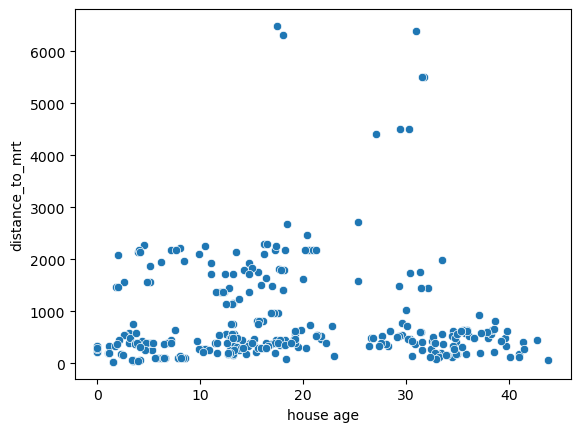

In [94]:
# seems like our correlation is ~0.04, let's see what's going on
# TODO: Create a scatter-plot that reveals the relationship of "Payment Method" for each "Purchase Amount (USD)"
# Documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

...

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

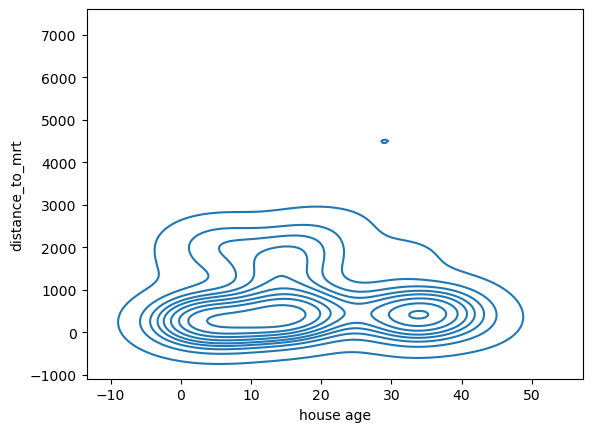

In [96]:
# When our scatter-points are overlayed on each other, we can also use
# a kde-plot to view the density of scatter-points
# this is helpful in identifying clusters
# TODO: Create a scatter-plot that reveals the relationship of "Payment Method" for each "Purchase Amount (USD)"
# Documentation: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

...

## Data Exploration II

While these visualizations on basic facets of the dataset are already quite comprehensive, we can take this a step further by dividing our dataframe into *groups*.

In [ ]:
# TODO: seperate our dataframe according to "room" categories to observe differences 
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

...

In [ ]:
# TODO: we cannot observe the intermediate grouped dataframe, but we can see the names of "groups" we've made
# Where else have we seen the "key" keyword???

...

In [ ]:
# TODO: let's calculate some aggregates per group
# We call this the split,apply,combine pattern
# Documentation: https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/groupby.html

...

In [ ]:
# TODO: let's visualize this as well using a bar-plot
# and let's attach labels!
# Documentation: https://matplotlib.org/stable/tutorials/pyplot.html#plotting-with-keyword-strings

...

In [ ]:
# TODO: let's visualize this with error-bars! (not enough data)
# Documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html

...

In [ ]:
# we can also "group" or "bin" our dataframe according to values 
# for example, let's consider our histogram again...

...

In [ ]:
# TODO: let's say we want to "group" or "bin" our "distance_to_mrt" column to two categories: close to mrt and far
# instead of attempting to do this ourselves, we can use the "qcut" function to seperate our data into "quantiles"
# 10 for deciles, 4 for quartiles, 2 for halves
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

...

In [ ]:
# TODO: we can take this a step further and label these quantiles for analysis

...

In [ ]:
# TODO: notice how these are not saved by default, we can assign this to a new column...

...

In [ ]:
# and then explore this column using visuals
# notice that these are equal to one another! We expect this since quantiles creates groups of equal size

...